# Data Cleaning, preprocessing and EDA

### 1.Data Cleaning and preprocessing

In [1]:
# import pandas for dataframe
import pandas as pd

In [2]:
# loading all csv files into dataframe
df_sales = pd.read_csv('DataSet/Sales.csv')
df_stores = pd.read_csv('DataSet/Stores.csv')
df_products = pd.read_csv('DataSet/Products.csv')
df_customers = pd.read_csv('DataSet/Customers.csv', encoding="latin-1")
df_exchange = pd.read_csv('DataSet/Exchange_Rates.csv')

In [3]:
# to view dtypes and null values
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


<Axes: >

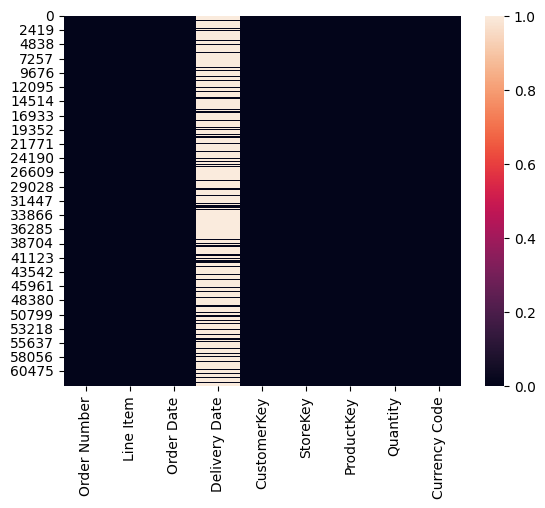

In [4]:
import seaborn as sns

sns.heatmap(df_sales.isnull())

In [5]:
df_sales = df_sales.drop(['Delivery Date'], axis=1)

<Axes: >

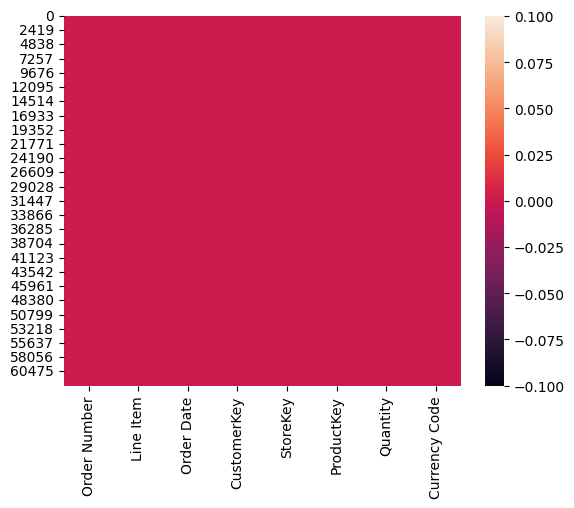

In [6]:
sns.heatmap(df_sales.isnull())

In [7]:
# df_sales.shape
# df_customers.shape
# df_exchange.shape
# df_products.shape
# df_stores.shape

In [8]:
df_stores.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [9]:
df_sales[df_sales['StoreKey']==0]

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
1,366001,1,1/1/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,266019,0,373,1,CAD
5,366002,3,1/1/2016,266019,0,1080,4,CAD
...,...,...,...,...,...,...,...,...
62878,2243029,6,2/20/2021,887764,0,1456,2,EUR
62880,2243031,1,2/20/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,331277,0,1717,2,CAD


In [10]:
df_stores.fillna(0, inplace=True)

In [11]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  67 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [12]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [13]:
df_customers.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [14]:
df_customers.dropna(inplace=True)

In [15]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15256 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15256 non-null  int64 
 1   Gender       15256 non-null  object
 2   Name         15256 non-null  object
 3   City         15256 non-null  object
 4   State Code   15256 non-null  object
 5   State        15256 non-null  object
 6   Zip Code     15256 non-null  object
 7   Country      15256 non-null  object
 8   Continent    15256 non-null  object
 9   Birthday     15256 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.3+ MB


In [16]:
merged_df1 = pd.merge(df_sales, df_customers, how='inner', on='CustomerKey')

In [17]:
merged_df2 = pd.merge(merged_df1, df_stores, how='inner',on='StoreKey')

In [18]:
merged_df3 = pd.merge(merged_df2, df_products, how='inner',on='ProductKey')

In [19]:
merged_df4 = pd.merge(merged_df3, df_exchange,how='inner' , left_on=['Order Date', 'Currency Code'], right_on=['Date', 'Currency'])

In [20]:
merged_df4.drop(['Date','Currency'], axis=1, inplace=True)

In [21]:
merged_df4.isnull().sum()

Order Number      0
Line Item         0
Order Date        0
CustomerKey       0
StoreKey          0
ProductKey        0
Quantity          0
Currency Code     0
Gender            0
Name              0
City              0
State Code        0
State_x           0
Zip Code          0
Country_x         0
Continent         0
Birthday          0
Country_y         0
State_y           0
Square Meters     0
Open Date         0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
Exchange          0
dtype: int64

# Load the Data in SQL DATABASE

In [22]:
# pip install pymysql sqlalchemy

In [23]:
import sqlalchemy as sa
from sqlalchemy import create_engine

In [24]:
# creating db connection url with pass and username 
myconn_url = sa.engine.URL.create(
    drivername='mysql+pymysql',
    username='username',
    password='password',
    host='localhost',
    database='salesdb'
)

# creating alchemy engine to connect with Database
engine = create_engine(myconn_url)

In [25]:
# store the datafame to mysql databse with 'sales_table' table name
merged_df4.to_sql('sales_table', engine, if_exists='replace', index=False)


62854

## EDA

### 1. Data Distribution

In [26]:
# import all data visualizing packages
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
merged_df4.describe()

,Order Number,Line Item,CustomerKey,StoreKey,ProductKey,Quantity,Square Meters,SubcategoryKey,CategoryKey,Exchange
count,6.285400e+04,62854.000000,6.285400e+04,62854.000000,62854.000000,62854.000000,62854.000000,62854.000000,62854.000000,62854.000000
mean,1.431105e+06,2.164349,1.181000e+06,31.804452,1125.849763,3.144923,1260.683568,450.211092,4.469739,0.992581
std,4.531579e+05,1.365332,5.860300e+05,22.982885,709.235066,2.256495,767.842411,212.722165,2.132800,0.161625
min,3.660000e+05,1.000000,3.010000e+02,0.000000,1.000000,1.000000,0.000000,101.000000,1.000000,0.672500
25%,1.122001e+06,1.000000,6.803065e+05,8.000000,437.000000,1.000000,840.000000,303.000000,3.000000,0.894800
50%,1.498017e+06,2.000000,1.261460e+06,37.000000,1358.000000,2.000000,1330.000000,501.000000,5.000000,1.000000
75%,1.788012e+06,3.000000,1.686629e+06,53.000000,1650.000000,4.000000,2000.000000,602.000000,6.000000,1.000000
max,2.243032e+06,7.000000,2.099937e+06,66.000000,2517.000000,10.000000,2105.000000,808.000000,8.000000,1.665200


array([[<Axes: title={'center': 'Order Number'}>,
        <Axes: title={'center': 'Line Item'}>,
        <Axes: title={'center': 'CustomerKey'}>],
       [<Axes: title={'center': 'StoreKey'}>,
        <Axes: title={'center': 'ProductKey'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Square Meters'}>,
        <Axes: title={'center': 'SubcategoryKey'}>,
        <Axes: title={'center': 'CategoryKey'}>],
       [<Axes: title={'center': 'Exchange'}>, <Axes: >, <Axes: >]],
      dtype=object)

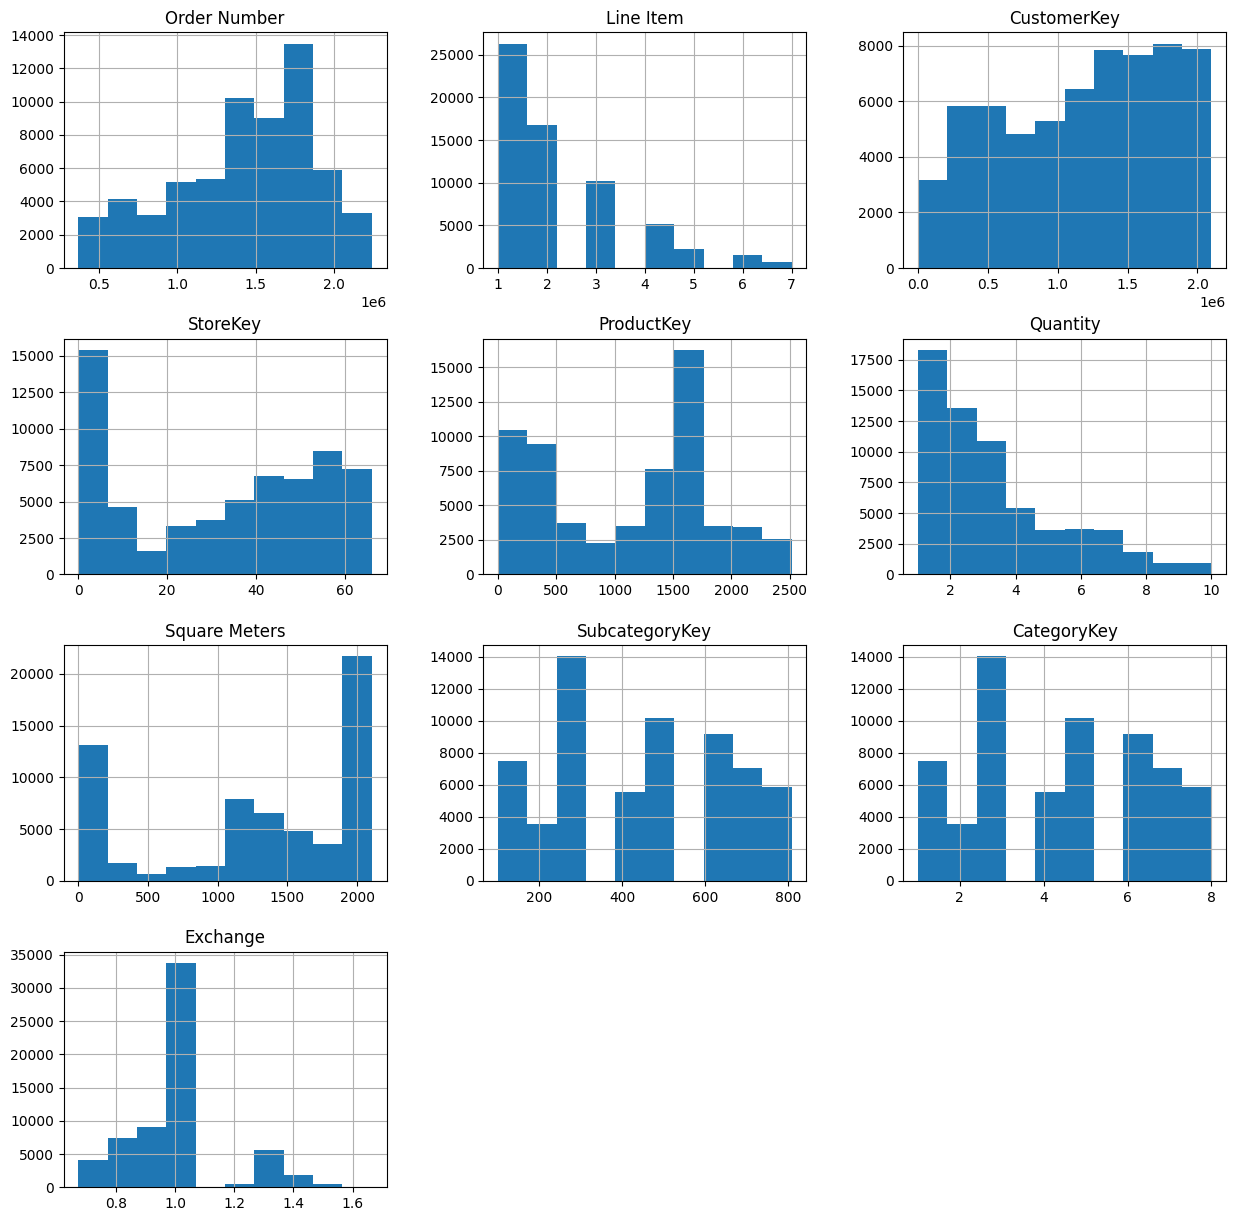

In [28]:
merged_df4.hist(figsize=(15,15))

->from the outlier of data distribution of store key it is evident that most people prefer buying in online store, otherwise it is normally distributed

-> Line item also shows a right skewed distribution, which suggests that some line items of 1-3 are very popular among customers.

-> from Quantity dristibution we can see most orders have 2-3 quantity as it is skewed to the right, which means most quantities are small

-> product key shows variation, with some products having higher counts

-> the square meter appers bimodal distribution with two distict peaks, which suggets two different categories of square meters (small vs large)

### 2. Relationship between Data 

In [29]:
# excluding all categorical data to only include numerical data
merged_df4_corr = merged_df4.select_dtypes(exclude=['object'])

<Axes: >

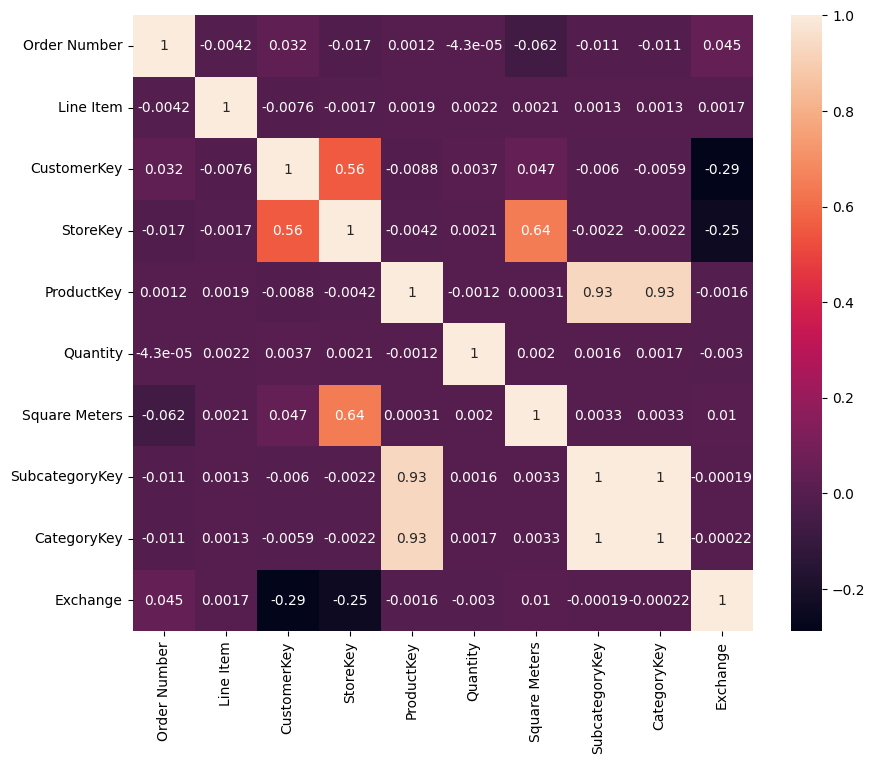

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(merged_df4_corr.corr(), annot=True, )

-> the store key and their square meters have a positive correlation, which suggests that they move together but there isn't much information we can get from this.